# Visualización con pandas II


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#sns.set_style('darkgrid')

### Múltiples gráficos en un lienzo

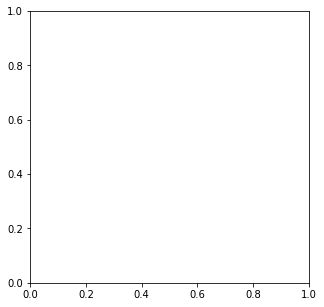

In [3]:
#Generas un gráfico vacío
fig,ax=plt.subplots(1,1,figsize=(5,5))

In [4]:
PATH = 'flavors_of_cacao.csv'

Paises = ['Argentina','Bolivia',
         'Brazil','Chile','Colombia','Costa Rica','Guatemala','Ecuador',
        'Mexico','Nicaragua','Peru','Puerto Rico','Venezuela']

In [5]:
data = pd.read_csv(PATH)

In [6]:
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


### Redondear

In [7]:
data["Rating"]=data["Rating"].round()

In [8]:
#Cambiar nombres de las columnas
data.columns = ['Fabricante', 'Produto', 'REF',
                'Fecha_de_review', 'Porcenta_de_cacao', 
                'Local_empresa', 'Rating', 'Tipo_grano', 'Origen_grano']
data

,Fabricante,Produto,REF,Fecha_de_review,Porcenta_de_cacao,Local_empresa,Rating,Tipo_grano,Origen_grano
0,A. Morin,Agua Grande,1876,2016,63%,France,4.0,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,3.0,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.0,,Togo
3,A. Morin,Akata,1680,2015,70%,France,4.0,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,4.0,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,4.0,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.0,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,4.0,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.0,,India


### Tabla cruzada o de contingencia

Tablas que me dan el número de veces (frecuencias) que intersectan valores de dos columnas. 

In [9]:
crosstab=pd.crosstab(data["Rating"],data["Local_empresa"])

In [10]:
#Se hizo un lista con algunos pocos países y le hicimos una tabla cruzada con rating
crosstab=crosstab[Paises]

Text(0.5, 0.98, 'Rating de chocolate por país')

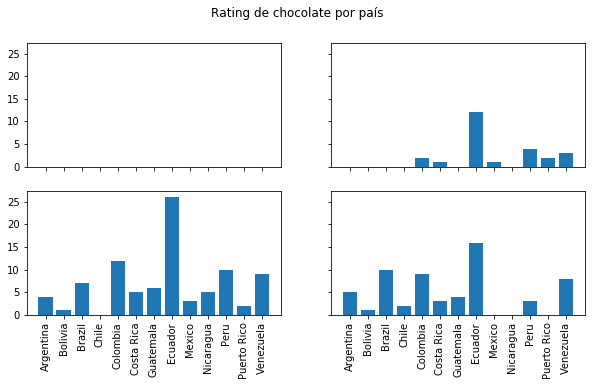

In [11]:
#grafico rating 2,3,4,5 haciendo subplots
#parametros share me permiten simplificar 
fig,ax=plt.subplots(2,2,figsize=(10,5),sharey=True,sharex=True)
#ax[i][j] hace referencia al gráfico en la posición i,j
ax[0][0].bar(crosstab.columns,crosstab.loc[1])
ax[0][1].bar(crosstab.columns,crosstab.loc[2])
ax[1][0].bar(crosstab.columns,crosstab.loc[3])
ax[1][1].bar(crosstab.columns,crosstab.loc[4])

ax[1][1].tick_params(axis="x",rotation=90)
ax[1][0].tick_params(axis="x",rotation=90)

fig.suptitle("Rating de chocolate por país")

# Seaborn

### Histogramas apilados

In [12]:
#Esta librería ya incluye un dataset, usaré penguins
df = sns.load_dataset("penguins")

In [13]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [14]:
#Actualizar versión de sns

In [15]:
sns.__version__

'0.12.2'

In [16]:
#conda install seaborn=0.12.2

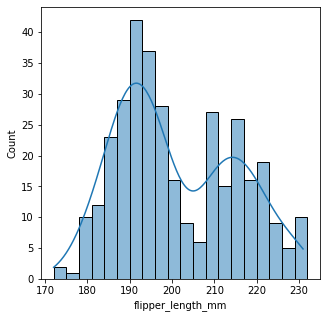

In [30]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.histplot(data=df, x="flipper_length_mm", binwidth=3,kde=True)
#kde funcion de densidad

### Diagramas de dispersión

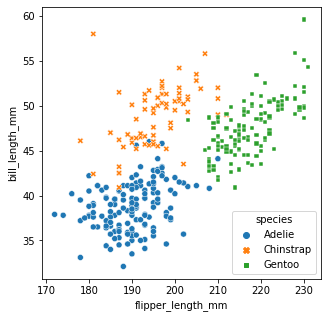

In [27]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(data=df,
                x="flipper_length_mm",
                y="bill_length_mm",
                hue="species",
                style="species")

### Boxplot

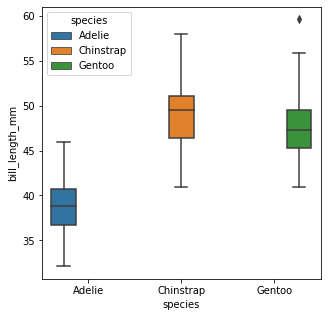

In [28]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

sns.boxplot(data=df, y='bill_length_mm', x='species', hue='species')

### Violinplot

Tiene la informacion de un boxplot, punto blanco=mediana, están cuartiles y bigotes. Adicional a esto, tiene incluida la forma el parámetro kde que me da la función de densidad de los datos.

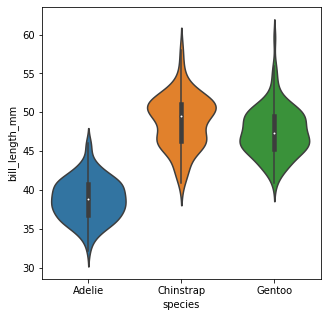

In [31]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

sns.violinplot(data=df, y='bill_length_mm', x='species')

### Joinplots

Diagrama de dispersión. Adicional a esto añade los histogramas de la variable x,y.

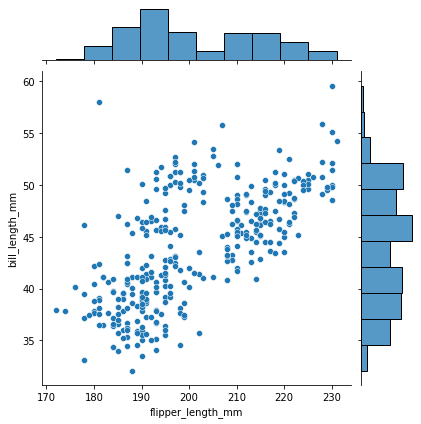

In [36]:


sns.jointplot(data=df, y='bill_length_mm', x='flipper_length_mm')

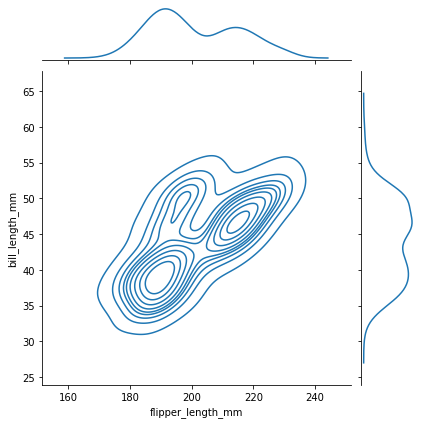

In [41]:
#Si agrego kind="kde" me grafica las distribuciones para los histogramas y para 
#el gráfico de disperción me grafica las curvas de nivel
sns.jointplot(data=df, y='bill_length_mm', x='flipper_length_mm', kind="kde")


Para más info revisar la documentación
https://seaborn.pydata.org/generated/seaborn.jointplot.html

### Pairplot

Toma todas las variables (columnas) numéricas. La diagonal serán los histogramas, las otras posiciones son los scatterplot, esto me permite relacionar todas las variables.

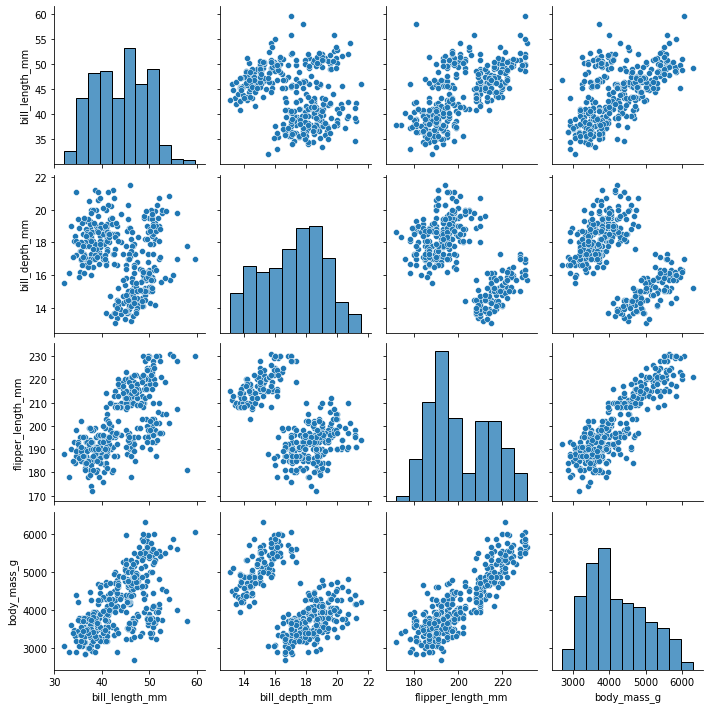

In [42]:
sns.pairplot(df)

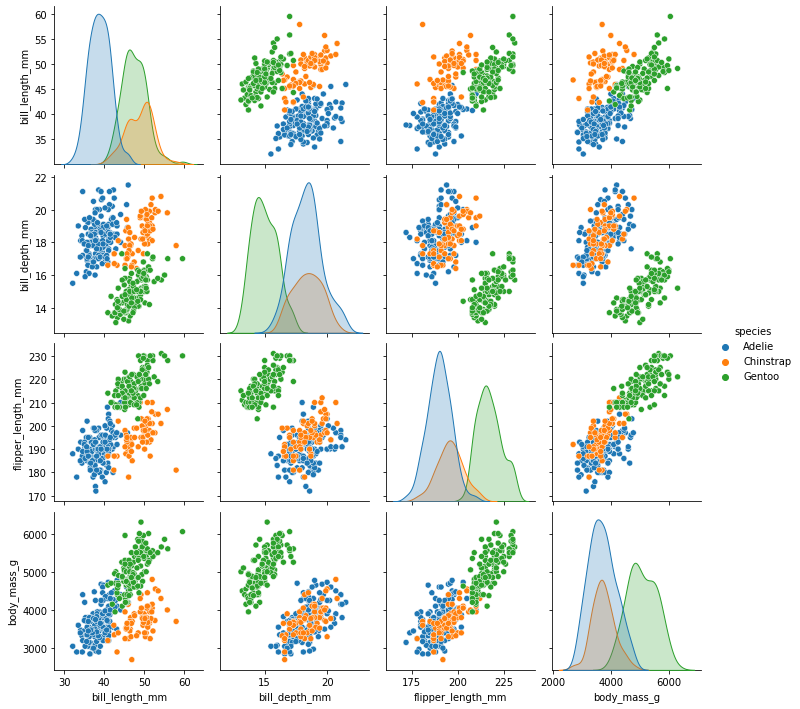

In [43]:
sns.pairplot(df,hue="species")

Para más info ver https://seaborn.pydata.org/generated/seaborn.pairplot.html